# Gapminder Dataset Workflow
> Preprocessing, Analysis, and Visualization

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Set up directories

In [6]:
# Replace with the correct path to your Gapminder dataset
DATA_FILE = "data/raw/gapminder-FiveYearData.csv"  
RESULTS_DIR = "results"

os.makedirs(RESULTS_DIR, exist_ok=True)

## Step 1: Preprocessing

In [8]:
def load_and_clean_data(data_file):
    """
    Load and clean the Gapminder dataset.
    - Handles missing values.
    - Formats column names if necessary.
    """
    data = pd.read_csv(data_file)
    
    # Rename columns for better readability (optional)
    data.columns = [col.strip().replace(" ", "_").lower() for col in data.columns]
    
    # Drop rows with missing values
    data = data.dropna()
    
    return data

# Load and preprocess the data
print("Preprocessing data...")
data = load_and_clean_data(DATA_FILE)
cleaned_data_file = f"{RESULTS_DIR}/tables/cleaned_gapminder.csv"
data.to_csv(cleaned_data_file, index=False)
print(f"Cleaned data saved to {cleaned_data_file}")

Preprocessing data...
Cleaned data saved to results/tables/cleaned_gapminder.csv


## Step 2: Analysis

In [11]:
# Look at the data 
data.head()

,country,year,pop,continent,lifeexp,gdppercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [12]:
def analyze_data(data):
    """
    Summarize data by continent:
    - Calculate average life expectancy, GDP per capita, and population by continent.
    """
    summary = data.groupby("continent")[["lifeexp", "gdppercap", "pop"]].mean().reset_index()
    return summary

print("Analyzing data...")
analysis_summary = analyze_data(data)
analysis_summary_file = f"{RESULTS_DIR}/continent_summary.csv"
analysis_summary.to_csv(analysis_summary_file, index=False)
print(f"Analysis summary saved to {analysis_summary_file}")


Analyzing data...
Analysis summary saved to results/continent_summary.csv


## Step 3: Visualization

Visualizing data...


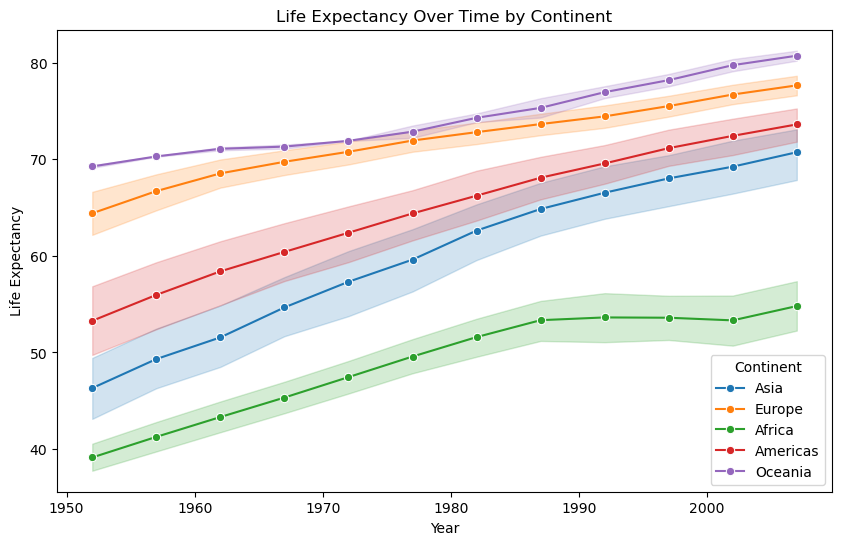

Life expectancy plot saved to results/life_expectancy_over_time.png


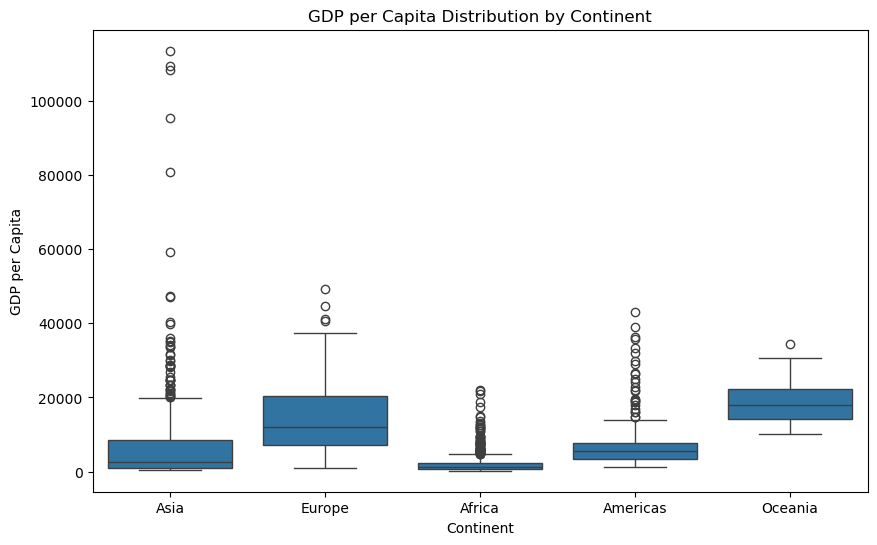

GDP per capita plot saved to results/gdp_per_capita_distribution.png
Workflow completed successfully!


In [14]:
def visualize_data(data, results_dir):
    """
    Generate visualizations:
    - Life expectancy over time by continent.
    - GDP per capita distribution by continent.
    """
    # Life Expectancy Over Time
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=data, x="year", y="lifeexp", hue="continent", marker="o")
    plt.title("Life Expectancy Over Time by Continent")
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy")
    plt.legend(title="Continent")
    life_expectancy_plot = f"{results_dir}/life_expectancy_over_time.png"
    plt.savefig(life_expectancy_plot)
    plt.show()
    print(f"Life expectancy plot saved to {life_expectancy_plot}")

    # GDP per Capita Distribution
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x="continent", y="gdppercap")
    plt.title("GDP per Capita Distribution by Continent")
    plt.xlabel("Continent")
    plt.ylabel("GDP per Capita")
    gdp_plot = f"{results_dir}/gdp_per_capita_distribution.png"
    plt.savefig(gdp_plot)
    plt.show()
    print(f"GDP per capita plot saved to {gdp_plot}")

print("Visualizing data...")
visualize_data(data, RESULTS_DIR)

# Workflow Complete
print("Workflow completed successfully!")